In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file = '/content/drive/MyDrive/iris.csv'
df = pd.read_csv(file)

print( df['variety'].unique() )

['Setosa' 'Versicolor' 'Virginica']


Kwiat -> Versicolor

In [ ]:
df['y'] = df['variety'].apply(lambda x: 1 if x == 'Versicolor' else 0)

uWartosci = df['variety'].unique()
for x in uWartosci:
  print(df[df['variety'] == x].head(5))

   sepal.length  sepal.width  petal.length  petal.width variety  y
0           5.1          3.5           1.4          0.2  Setosa  0
1           4.9          3.0           1.4          0.2  Setosa  0
2           4.7          3.2           1.3          0.2  Setosa  0
3           4.6          3.1           1.5          0.2  Setosa  0
4           5.0          3.6           1.4          0.2  Setosa  0
    sepal.length  sepal.width  petal.length  petal.width     variety  y
50           7.0          3.2           4.7          1.4  Versicolor  1
51           6.4          3.2           4.5          1.5  Versicolor  1
52           6.9          3.1           4.9          1.5  Versicolor  1
53           5.5          2.3           4.0          1.3  Versicolor  1
54           6.5          2.8           4.6          1.5  Versicolor  1
     sepal.length  sepal.width  petal.length  petal.width    variety  y
100           6.3          3.3           6.0          2.5  Virginica  0
101           5.8     

In [ ]:
x = df[['sepal.length','sepal.width','petal.length','petal.width']].to_numpy()
y = df['y'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4, name="first"))
model.add(Dense(1, activation='sigmoid', name="second"))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=5000, batch_size=20, verbose=0)

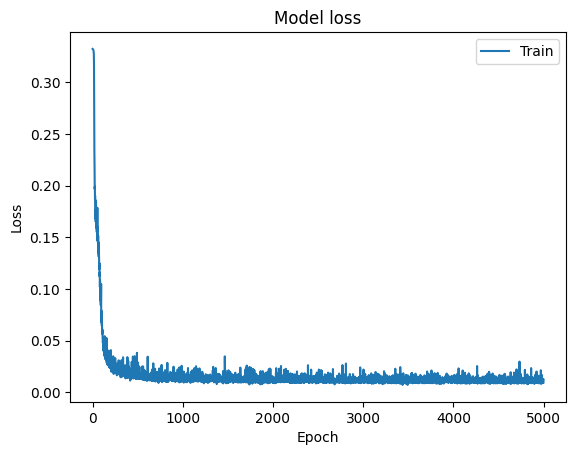

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
import numpy as np

y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)

bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

4/4 [==============================] - 0s 2ms/step
Liczba bledow ciagu treningowego:  1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

4/4 [==============================] - 0s 2ms/step
Accuracy: 0.9916666666666667
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[80  0]
 [ 1 39]]


In [ ]:
history = model.fit(x_test, y_test, epochs=2000, batch_size=10, verbose=0)

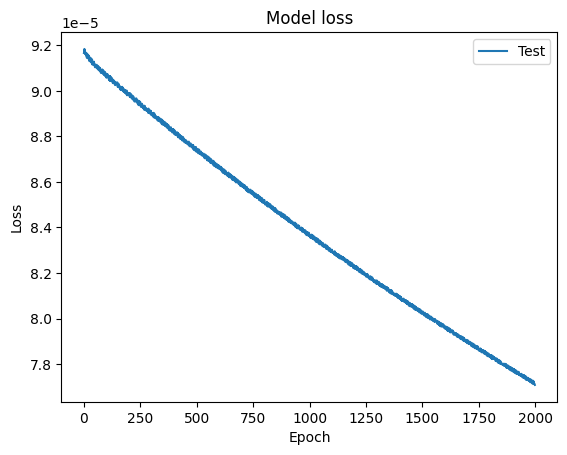

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

In [ ]:
y_result_test = model.predict(x_test)
y_result_test = np.round(y_result_test)

bledy = 0
for i in range(len(y_test)):
 if y_result_test[i] != y_test[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

1/1 [==============================] - 0s 17ms/step
Liczba bledow ciagu testowego:  0


In [ ]:
# Przewidywanie wyników
y_pred = model.predict(x_test)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

1/1 [==============================] - 0s 14ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]


Kwiat -> Setosa

In [ ]:
df['y'] = df['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)

uWartosci = df['variety'].unique()
for x in uWartosci:
  print(df[df['variety'] == x].head(5))

   sepal.length  sepal.width  petal.length  petal.width variety  y
0           5.1          3.5           1.4          0.2  Setosa  1
1           4.9          3.0           1.4          0.2  Setosa  1
2           4.7          3.2           1.3          0.2  Setosa  1
3           4.6          3.1           1.5          0.2  Setosa  1
4           5.0          3.6           1.4          0.2  Setosa  1
    sepal.length  sepal.width  petal.length  petal.width     variety  y
50           7.0          3.2           4.7          1.4  Versicolor  0
51           6.4          3.2           4.5          1.5  Versicolor  0
52           6.9          3.1           4.9          1.5  Versicolor  0
53           5.5          2.3           4.0          1.3  Versicolor  0
54           6.5          2.8           4.6          1.5  Versicolor  0
     sepal.length  sepal.width  petal.length  petal.width    variety  y
100           6.3          3.3           6.0          2.5  Virginica  0
101           5.8     

In [ ]:
x = df[['sepal.length','sepal.width','petal.length','petal.width']].to_numpy()
y = df['y'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4, name="first"))
model.add(Dense(1, activation='sigmoid', name="second"))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=0)

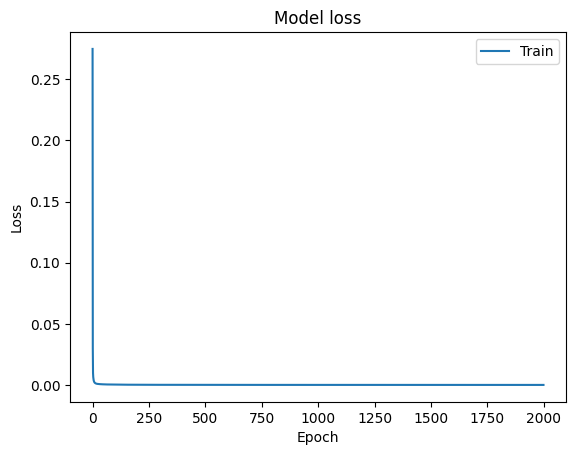

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)

bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

4/4 [==============================] - 0s 2ms/step
Liczba bledow ciagu treningowego:  0


In [ ]:
# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

4/4 [==============================] - 0s 1ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[80  0]
 [ 0 40]]


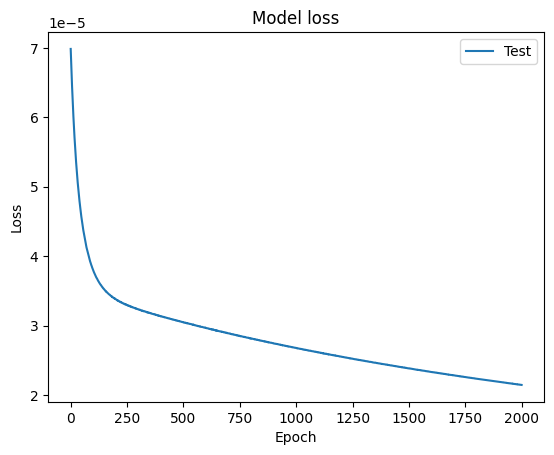

1/1 [==============================] - 0s 19ms/step
Liczba bledow ciagu testowego:  0
1/1 [==============================] - 0s 20ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]


In [ ]:
history = model.fit(x_test, y_test, epochs=2000, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

y_result_test = model.predict(x_test)
y_result_test = np.round(y_result_test)

bledy = 0
for i in range(len(y_test)):
 if y_result_test[i] != y_test[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_test)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

Kwiat -> Virginica

   sepal.length  sepal.width  petal.length  petal.width variety  y
0           5.1          3.5           1.4          0.2  Setosa  0
1           4.9          3.0           1.4          0.2  Setosa  0
2           4.7          3.2           1.3          0.2  Setosa  0
3           4.6          3.1           1.5          0.2  Setosa  0
4           5.0          3.6           1.4          0.2  Setosa  0
    sepal.length  sepal.width  petal.length  petal.width     variety  y
50           7.0          3.2           4.7          1.4  Versicolor  0
51           6.4          3.2           4.5          1.5  Versicolor  0
52           6.9          3.1           4.9          1.5  Versicolor  0
53           5.5          2.3           4.0          1.3  Versicolor  0
54           6.5          2.8           4.6          1.5  Versicolor  0
     sepal.length  sepal.width  petal.length  petal.width    variety  y
100           6.3          3.3           6.0          2.5  Virginica  1
101           5.8     

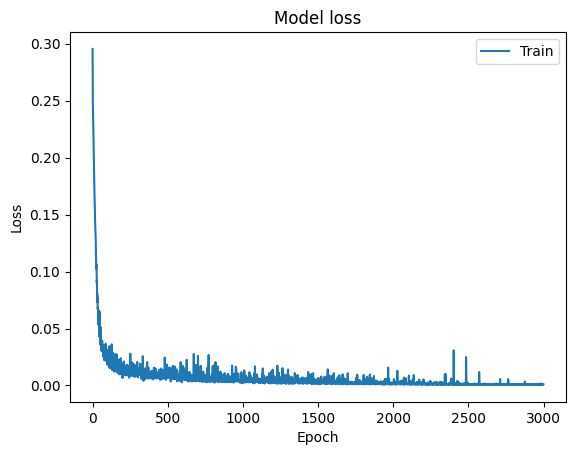

4/4 [==============================] - 0s 2ms/step
Liczba bledow ciagu treningowego:  0
4/4 [==============================] - 0s 2ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[80  0]
 [ 0 40]]


In [ ]:
df['y'] = df['variety'].apply(lambda x: 1 if x == 'Virginica' else 0)

uWartosci = df['variety'].unique()
for x in uWartosci:
  print(df[df['variety'] == x].head(5))

x = df[['sepal.length','sepal.width','petal.length','petal.width']].to_numpy()
y = df['y'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4, name="first"))
model.add(Dense(1, activation='sigmoid', name="second"))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=3000, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)

bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

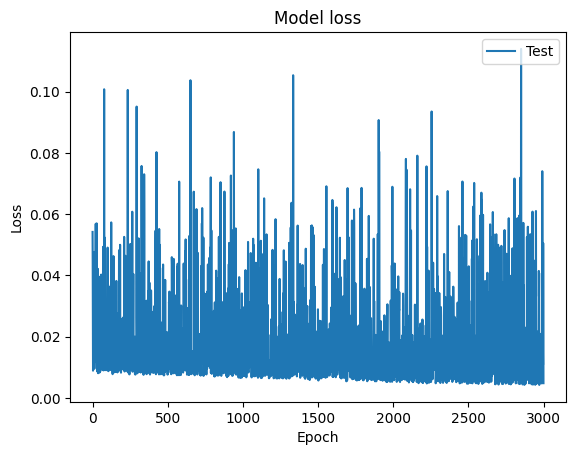

1/1 [==============================] - 0s 19ms/step
Liczba bledow ciagu testowego:  0
1/1 [==============================] - 0s 18ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]


In [ ]:
history = model.fit(x_test, y_test, epochs=3000, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

y_result_test = model.predict(x_test)
y_result_test = np.round(y_result_test)

bledy = 0
for i in range(len(y_test)):
 if y_result_test[i] != y_test[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_test)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

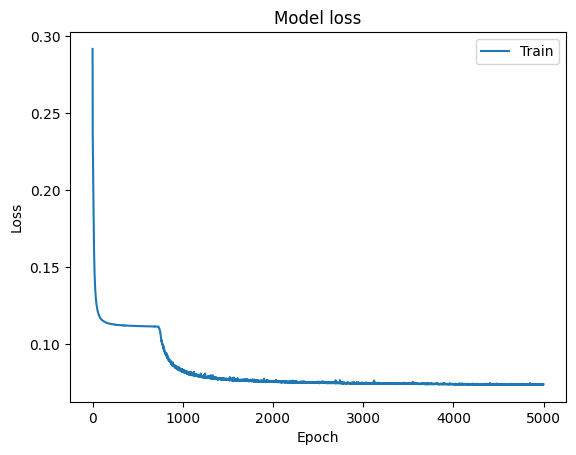

4/4 [==============================] - 0s 2ms/step


In [ ]:
df['y1'] = df['variety'].apply(lambda x: 1 if x == 'Setosa' else 0)
df['y2'] = df['variety'].apply(lambda x: 1 if x == 'Versicolor' else 0)
df['y3'] = df['variety'].apply(lambda x: 1 if x == 'Virginica' else 0)

x = df[['sepal.length','sepal.width','petal.length','petal.width']].to_numpy()
y = df[['y1', 'y2', 'y3']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=5000, batch_size=10, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)


from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

y_pred = model.predict(x_train)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_train, axis=1), y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_train, axis=1), y_pred_rounded, average='macro')
conf_matrix = confusion_matrix(np.argmax(y_train, axis=1), y_pred_rounded)


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.975
Precision: 0.9767441860465116
Recall: 0.9767441860465116
Confusion Matrix:
 [[40  0  0]
 [ 0 37  3]
 [ 0  0 40]]


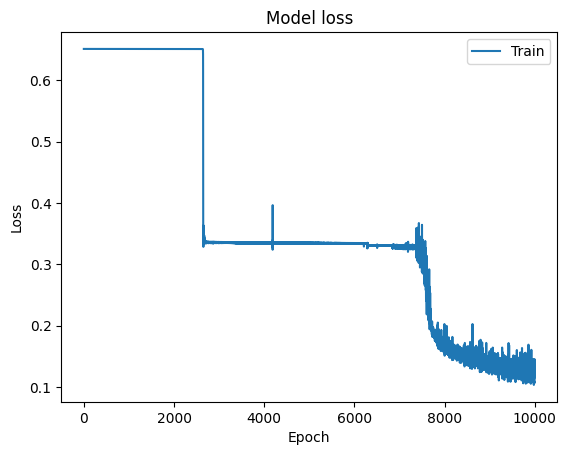

20/20 [==============================] - 0s 2ms/step
Liczba bledow ciagu treningowego:  94
20/20 [==============================] - 0s 2ms/step
Accuracy: 0.8469055374592834
Precision: 0.8614457831325302
Recall: 0.8614457831325302
Confusion Matrix:
 [[377  23]
 [ 71 143]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
import numpy as np

file2 = '/content/drive/MyDrive/pid.csv'
df2 = pd.read_csv(file2)

x = df2[['pregnancies','glucose','blood_pressure','skin_thickness','insulin','bmi','diabetes_pedigree_function','age']].to_numpy()
y = df2['class'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=10000, batch_size=1000000000, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

y_result_train = model.predict(x_train)
y_result_train = np.round(y_result_train)

bledy = 0
for i in range(len(y_train)):
 if y_result_train[i] != y_train[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded)
recall = recall_score(y_train, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_train, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

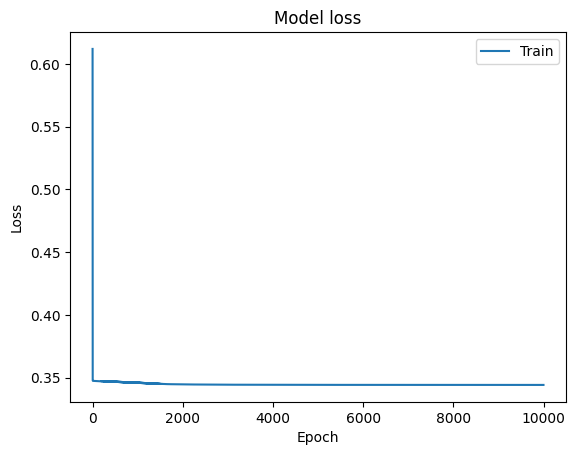

5/5 [==============================] - 0s 3ms/step
Liczba bledow ciagu treningowego:  53
5/5 [==============================] - 0s 2ms/step
Accuracy: 0.6558441558441559
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[100   0]
 [ 53   1]]


In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.1), loss='mse' ,metrics=['accuracy'] )

history = model.fit(x_test, y_test, epochs=10000, batch_size=1000000000, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

y_result_test = model.predict(x_test)
y_result_test = np.round(y_result_test)

bledy = 0
for i in range(len(y_test)):
 if y_result_test[i] != y_test[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_test)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded)
recall = recall_score(y_test, y_pred_rounded)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)